In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams, cycler

path = r"../Classifications/{}.txt"
proteases = ["HCV", "HCV_A171T", "HCV_D183A", "HCV_R170K_A171T_D183A"]
magnitudes = np.zeros(shape = (len(proteases), 2), dtype = np.int)
for i, p in enumerate(proteases):
    df = pd.read_csv(path.format(p), sep = "\t")
    num_cleaved = sum([x.upper() == "CLEAVED" for x in df["Result"]])
    num_uncleaved = sum([x.upper() == "UNCLEAVED" for x in df["Result"]])
    magnitudes[i, 0] = num_cleaved
    magnitudes[i, 1] = num_uncleaved

In [68]:
print(magnitudes)

[[1932 5410]
 [3644 9564]
 [4350 7514]
 [3135 3703]]


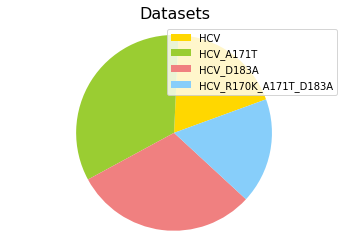

In [88]:
# Data to plot
sizes = np.sum(magnitudes, axis = 1)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
fontdict = {'fontsize': 16}

# Plot
patches, texts = plt.pie(sizes, colors=colors, shadow=False, startangle=20)
plt.legend(patches, proteases, loc="best")
plt.title('Datasets', fontdict = fontdict)
plt.axis('equal')
plt.savefig("piedist.png", format="png", dpi=1000)
plt.show()

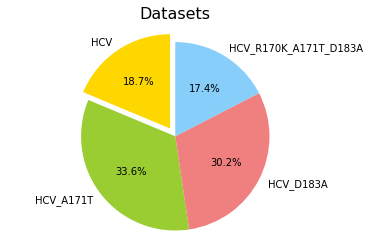

In [89]:
# Data to plot
sizes = np.sum(magnitudes, axis = 1)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=proteases, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=90)
#plt.legend(patches, proteases, loc="best")
plt.title('Datasets', fontdict =  fontdict)
plt.axis('equal')
plt.savefig("piedist.png", format="png", dpi=1000, transparent=True)
plt.show()

In [90]:
vals = ["Cleaved", "Uncleaved"]
colors_class = ["tomato", "royalblue"]

colors_inner = []
magnitudes_inner = []
for i, p in enumerate(proteases):
    for j, val in enumerate(vals):
        mag = magnitudes[i,j]
        colors_inner.append(colors_class[j])
        magnitudes_inner.append(mag)
print(magnitudes_inner)
print(colors_inner)
print(sizes)
print(colors)
print(proteases)
explode_inner = tuple(explode[int(i/2)] for i in range(len(explode * 2)))
print(explode_inner)

[1932, 5410, 3644, 9564, 4350, 7514, 3135, 3703]
['tomato', 'royalblue', 'tomato', 'royalblue', 'tomato', 'royalblue', 'tomato', 'royalblue']
[ 7342 13208 11864  6838]
['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
['HCV', 'HCV_A171T', 'HCV_D183A', 'HCV_R170K_A171T_D183A']
(0.1, 0.1, 0, 0, 0, 0, 0, 0)


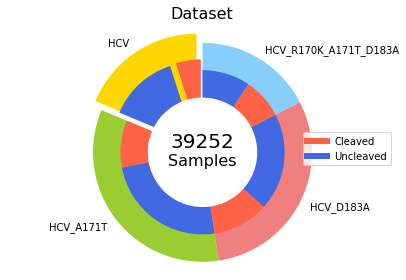

In [95]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='tomato', lw=6),
                Line2D([0], [0], color='royalblue', lw=6)]

# Plot
plt.pie(sizes, explode=explode, labels=proteases, colors=colors, shadow=False, startangle=90, frame=True)
plt.pie(magnitudes_inner,explode = explode_inner, colors=colors_inner,radius=0.75,startangle=90)
plt.title('Dataset', fontdict =  fontdict)

centre_circle = plt.Circle((0,0),0.5,color='black', fc='white', linewidth = 0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.legend(custom_lines, ['Cleaved', 'Uncleaved'], loc = "center right")
plt.text(0,0,f"\nSamples",horizontalalignment='center',verticalalignment='center',
         fontdict = {'fontsize':16})
plt.text(0,0,f"{np.sum(magnitudes)}\n",horizontalalignment='center',verticalalignment='center',
         fontdict = {'fontsize':20})
plt.axis('equal')
plt.tight_layout()
plt.savefig("piedist.png", format="png", dpi=1000, transparent=True)
plt.show()